In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
path = r'C:\Users\Anna\Desktop\Data Analytics\Instacart Basket Analysis'

In [8]:
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '2 Data', 'Prepared Data', 'df_ords_prods_custmrs.pkl'))
df_ords_prods_cust.shape

(252953, 35)

In [9]:
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252953 entries, 0 to 252952
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   order_id                     100000 non-null  float64 
 1   user_id                      252953 non-null  int64   
 2   eval_set                     100000 non-null  object  
 3   order_number                 100000 non-null  float64 
 4   order_dow                    100000 non-null  float64 
 5   order_hour_of_day            100000 non-null  float64 
 6   days_since_prior_order       93365 non-null   float64 
 7   product_id                   100000 non-null  float64 
 8   add_to_cart_order            100000 non-null  float64 
 9   reordered                    100000 non-null  float64 
 10  product_name                 100000 non-null  object  
 11  aisle_id                     100000 non-null  float64 
 12  department_id                100000 non-null

<AxesSubplot:>

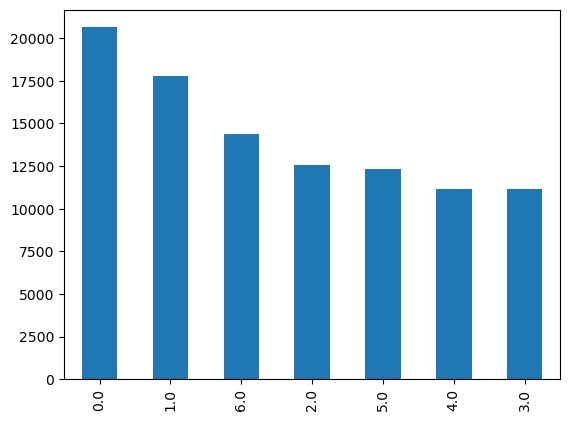

In [11]:
#create a bar chart
df_ords_prods_cust['order_dow'].value_counts().plot.bar()

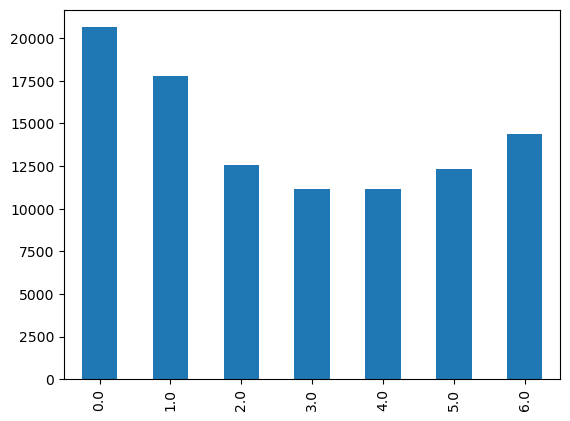

In [12]:
barchart_order_dow = df_ords_prods_cust['order_dow'].value_counts().sort_index().plot.bar()

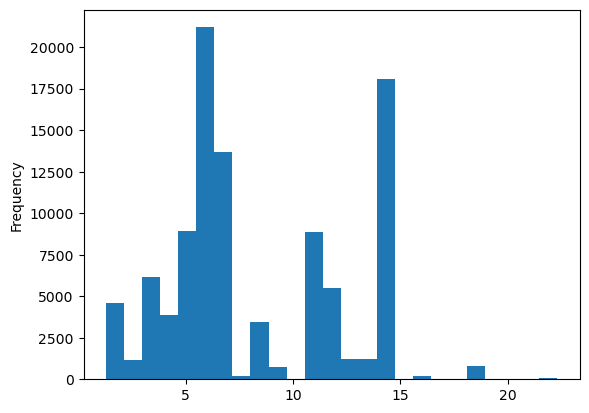

In [25]:
# create a histogram 
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 25)

In [26]:
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] >25, 'prices'] = np.nan

In [27]:
df_ords_prods_cust['prices'].max()

22.3

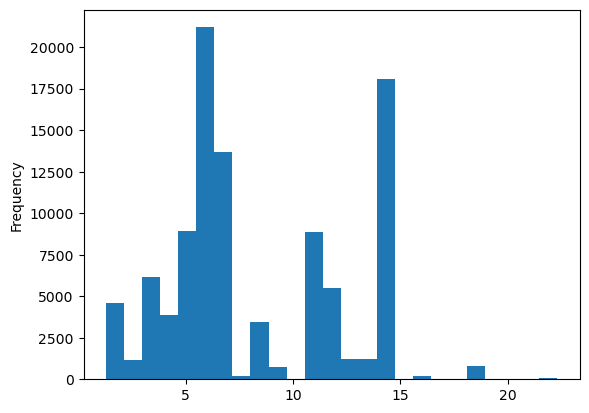

In [28]:
hist_prices = df_ords_prods_cust['prices'].plot.hist(bins = 25)

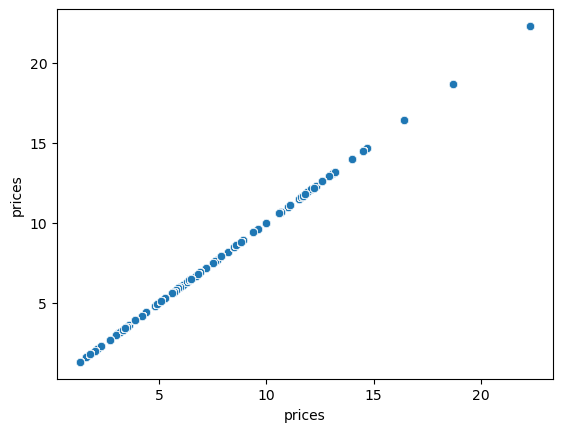

In [21]:
#Create scatterplot
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cust)

In [29]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [32]:
big_sample = df_ords_prods_cust[dev]

In [33]:
small_sample = df_ords_prods_cust[~dev]

In [34]:
len(dev)

252953

In [35]:
len(big_sample) + len(small_sample)

252953

In [37]:
df_small = small_sample[['order_dow','prices']]
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75703 entries, 0 to 252946
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   order_dow  30040 non-null  float64
 1   prices     30040 non-null  float64
dtypes: float64(2)
memory usage: 1.7 MB


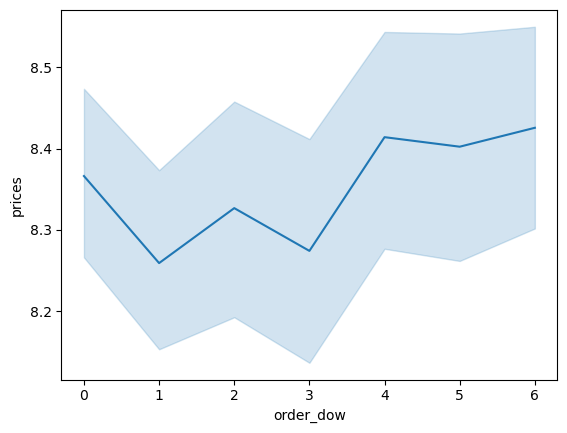

In [40]:
#creat a line chart

line_chart_dow_prices = sns.lineplot(data = df_small, x = 'order_dow',y = 'prices')

In [ ]:
#You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

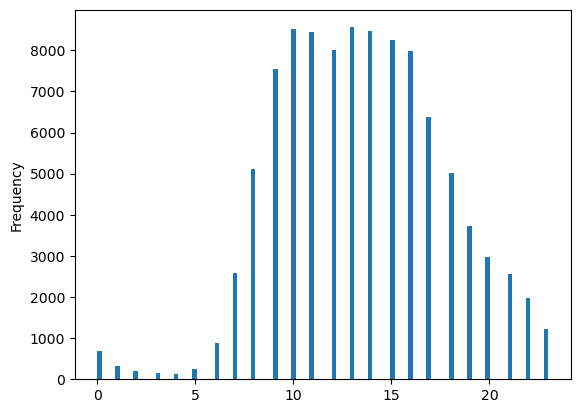

In [42]:
hist_order_hour_of_day = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 100)

The majority of orders are placed between 10 and 11:00 in the morning, and demands remain stable until 17 o'clock , then they begin to fall. The activity is much lower during the night hours: some orders are placed between the midnight and 08:00

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [45]:
df_ords_prods_cust.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_order_median_flag,first_name,surname,gender,state,age,registration_date,number_dependants,marital_status,income
0,2862468.0,66479,prior,24.0,4.0,13.0,10.0,24838.0,3.0,1.0,...,Frequent customer,Anthony,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187
1,2928198.0,66479,prior,31.0,0.0,16.0,7.0,24838.0,4.0,1.0,...,Frequent customer,Anthony,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187
2,1897405.0,66479,prior,11.0,3.0,16.0,2.0,24838.0,3.0,1.0,...,Frequent customer,Anthony,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187
3,2185483.0,66479,prior,51.0,1.0,13.0,3.0,24838.0,4.0,1.0,...,Frequent customer,Anthony,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187
4,1330685.0,66479,prior,22.0,5.0,16.0,5.0,24964.0,1.0,1.0,...,Frequent customer,Anthony,Benitez,Male,New Mexico,79,8/27/2017,1,married,118187


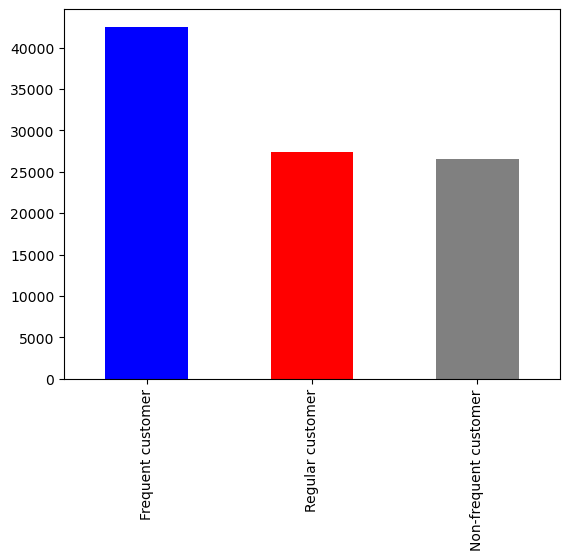

In [48]:
barchart_customer_loyalty = df_ords_prods_cust['frequency_order_median_flag'].value_counts().plot.bar(color = ['blue', 'red', 'grey'])

In [ ]:
The majority of customers belongs to Frequent customer

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [50]:
df_order_hour_of_day_prices = small_sample[['order_hour_of_day','prices']]
df_order_hour_of_day_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75703 entries, 0 to 252946
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_hour_of_day  30040 non-null  float64
 1   prices             30040 non-null  float64
dtypes: float64(2)
memory usage: 1.7 MB


In [51]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,13.0,5.3
2,16.0,5.3
3,13.0,5.3
6,16.0,6.8
10,15.0,5.3


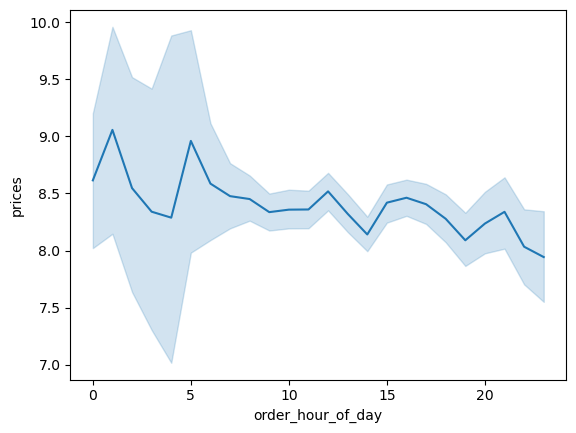

In [52]:
#creating a line chart demonstrated order frequency per hour
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [54]:
df_age_dependants = small_sample[['age','number_dependants']]
df_age_dependants.head()

,age,number_dependants
0,79,1
2,79,1
3,79,1
6,79,1
10,58,3


In [55]:
df_age_dependants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75703 entries, 0 to 252946
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                75703 non-null  int64
 1   number_dependants  75703 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB


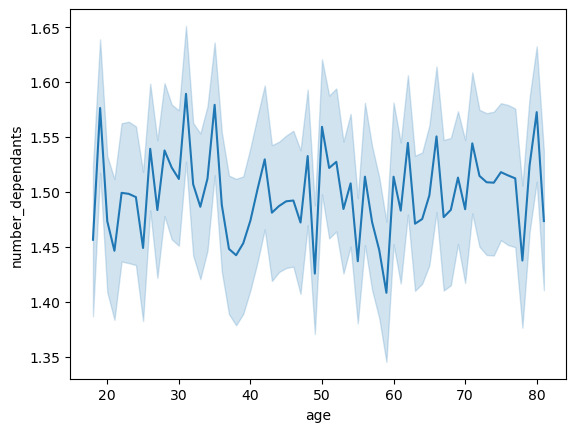

In [56]:
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'number_dependants')

In [ ]:
It is difficult to use this chart for further work, no obvious trend


In [60]:
df_age_dependants.describe()

,age,number_dependants
count,75703.000000,75703.000000
mean,49.513969,1.498131
std,18.438919,1.120501
min,18.000000,0.000000
25%,34.000000,0.000000
50%,49.000000,1.000000
75%,65.000000,3.000000
max,81.000000,3.000000


You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [61]:
df_age_income = small_sample[['age','income']]

In [62]:
df_age_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75703 entries, 0 to 252946
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     75703 non-null  int64
 1   income  75703 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


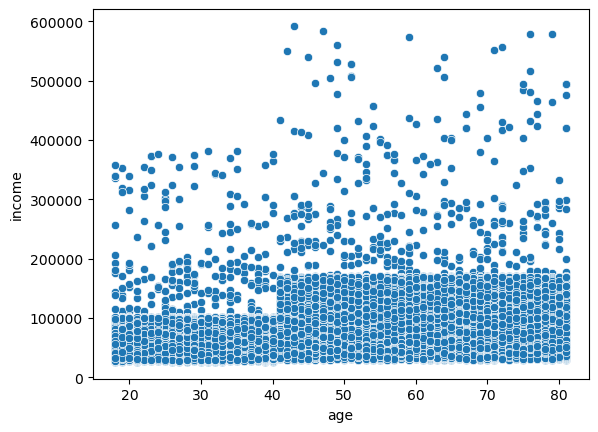

In [65]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

#The graph above demonstrated age on the x-axis and income is plotted on the y-axis. It can be observed that the income increases with age, making this client group more prosperous and with readiness to pay. After 40 y.o the clients tend to spend more. 

Export your visualizations as “.png” files in your relevant project folder.

In [66]:
barchart_order_dow.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'barchart_order_dow.png'))

In [67]:
hist_prices.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'hist_prices.png'))

In [68]:
scatterplot_prices.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'scatterplot_prices.png'))

In [70]:
line_chart_dow_prices.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'line_chart_dow_prices.png'))

In [71]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [72]:
barchart_customer_loyalty.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'barchart_customer_loyalty.png'))

In [73]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'line_chart_order_hour_of_day_prices.png'))

In [74]:
line_chart_age_dependants.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'line_chart_age_dependants.png'))

In [75]:
scatterplot_age_income.figure.savefig(os.path.join(path, '4 Analysis','Visualizations', 'scatterplot_age_income.png'))